Transformation parameters:
ar = 0.05
br = 0.8999999999999999


/tmp/ipython-input-2820878332.py:18: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data.csv', encoding='latin1')   # download from kaggle
/tmp/ipython-input-2820878332.py:30: RuntimeWarning: overflow encountered in exp
  return c * np.exp(-lam * (z - mu)**2)



===== FINAL PARAMETERS (SUBMIT THESE) =====
lambda = 0.002057636383206783
mu = 19.629489685653827
c = 0.026802857589245964


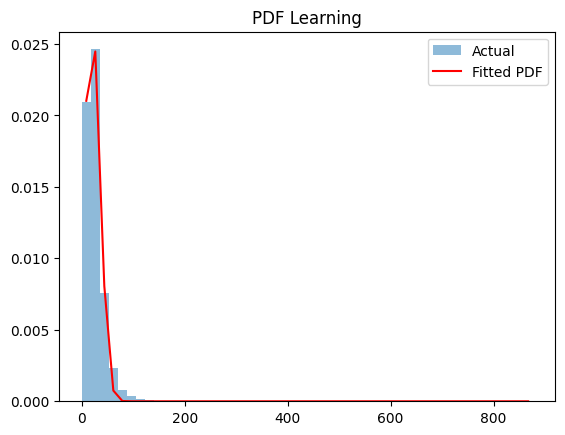

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# ========== STEP 0: ENTER YOUR ROLL ==========
r = 102303300

# ========== STEP 1: parameters ==========
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print("Transformation parameters:")
print("ar =", ar)
print("br =", br)

# ========== STEP 2: load dataset ==========
df = pd.read_csv('/content/data.csv', encoding='latin1')   # download from kaggle
x = df["no2"].dropna().values

# ========== STEP 3: transform ==========
z = x + ar * np.sin(br * x)

# ========== STEP 4: histogram ==========
hist, bins = np.histogram(z, bins=50, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# ========== STEP 5: PDF function ==========
def pdf(z, lam, mu, c):
    return c * np.exp(-lam * (z - mu)**2)

# ========== STEP 6: fit parameters ==========
params, _ = curve_fit(pdf, bin_centers, hist, p0=[0.01, np.mean(z), 1])

lam, mu, c = params

print("\n===== FINAL PARAMETERS (SUBMIT THESE) =====")
print("lambda =", lam)
print("mu =", mu)
print("c =", c)

# ========== STEP 7: plot ==========
plt.hist(z, bins=50, density=True, alpha=0.5, label="Actual")
plt.plot(bin_centers, pdf(bin_centers, lam, mu, c),
         'r', label="Fitted PDF")
plt.legend()
plt.title("PDF Learning")
plt.show()
